In [1]:
import os
import numpy as np
import matplotlib.pyplot as pit
import seaborn as sns

In [2]:
%pip install geopandas rioxarray earthpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import geopandas as gpd
import rioxarray as rxr
import earthpy as et

sns.set(font_scale=1.5, style="dark")

In [4]:
et.data.get_data("colorado-flood")

os.chdir(os.path.join(et.io.HOME, "earth-analytics", "data"))

In [5]:
dem_pre_path = os.path.join("colorado-flood",
                            "spatial", 
                            "boulder-leehill-rd",
                            "pre-flood",
                            "lidar",
                            "pre_DTM.tif")

dtm_pre_arr = rxr.open_rasterio(dem_pre_path)

dtm_pre_arr

<xarray.DataArray (band: 1, y: 2000, x: 4000)> Size: 32MB
[8000000 values with dtype=float32]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -3.4028235e+38
    scale_factor:   1.0
    add_offset:     0.0

In [6]:
dtm_pre_arr.rio.bounds()

(472000.0, 4434000.0, 476000.0, 4436000.0)

In [7]:
#check to see there is data
dtm_pre_arr.rio.nodata

-3.4028235e+38

In [8]:
dtm_pre_arr.plot

(array([ 842272.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0., 7157728.]),
 array([-3.40282347e+38, -3.06254122e+38, -2.72225877e+38, -2.38197633e+38,
        -2.04169408e+38, -1.70141173e+38, -1.36112939e+38, -1.02084704e+38,
        -6.80564693e+37, -3.40282347e+37,  2.08742993e+03]),
 <BarContainer object of 10 artists>)

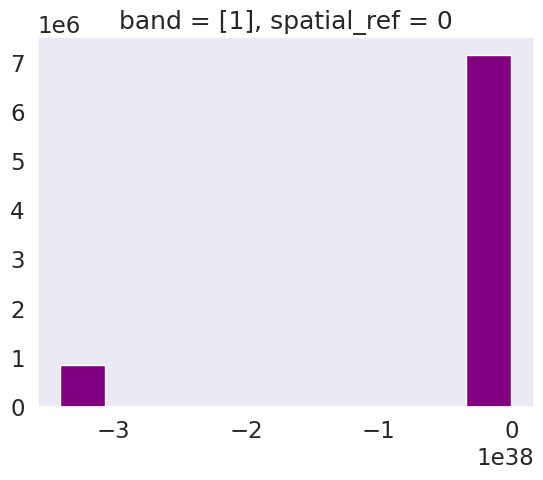

In [9]:
dtm_pre_arr.plot.hist(color="purple")

In [10]:
#QA/QC data
np.nanmin(dtm_pre_arr.values)

-3.4028235e+38

In [11]:
#QA/QC data
np.nanmax(dtm_pre_arr.values)

2087.43

In [12]:
dtm_pre_arr.shape

(1, 2000, 4000)

In [13]:
#dtm_pre_arr = rxr.open_rasterio(dem_pre_path, masked=True).squeeze{}

#dtm_pre_arr.shape

In [14]:
#f, ax = plt.subplots(figsize=(10,5))
#dtm_pre_arr.plot(cnap="Purples", ax=ax)
#
#ax.set_title("Lidar DEM\n Boulder Flood 2013")
#ax.set_axis_off()
#plt.show()

In [15]:
#f, ax = plt.subplots(figsize=(10, 6))
#dtm_pre_arr.plot.hist(color="pink", bins=20)
#pit.show()

In [16]:
#QA/QC data
np.nanmin(dtm_pre_arr.data)

-3.4028235e+38

In [17]:
#QA/QC data
np.nanmax(dtm_pre_arr.data)

2087.43

In [18]:
site_bound_path = os.path.join("colorado-flood", "spatial", "boulder-leehill-rd", "clip-extent.shp")


In [19]:
#f, ax = plt.subplots(figsize=(11,4))

#dtm_pre_arr.plot.inshow(cmap="Purples", ax=ax)

#site_bound_shp.plot(color="None", edgecolor="teal", linewidth=5, zorder=1)
#ax.